<h1 style="text-align: center;">💨 Regression CO2 Emmissions Notebook 💨</h1>


![alt text](pexels-pixabay-221012.jpg)

## Project Overview 🏭 
This project is about studying and predicting CO2 emissions in the agri-food sector. We will use data from the Food and Agriculture Organization (FAO) and the Intergovernmental Panel on Climate Change (IPCC). The goal is to understand how the sector affects the climate and to create strategies that help policymakers and agricultural businesses make more sustainable choices.

In [1]:
# !pip3 install numpy
# !pip3 install pandas 
# !pip3 install seaborn
# !pip3 install xgboost


## Importing Packages 🏭
- Import necessary libraries and packages required for data analysis and visualization.


In [2]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score


## Data Loading 🏭
Load and view the dataset containing contaminated avocado information.

In [3]:
#Import data and assess size of dataset

df = pd.read_csv('co2_emissions_from_agri.csv')
df.shape


(6965, 31)

In [4]:
#View first few rows of dataset
df.head(10)

,Area,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,...,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission,Average Temperature °C
0,Afghanistan,1990,14.7237,0.0557,205.6077,686.00,0.0,11.807483,63.1152,-2388.803,...,319.1763,0.0,0.0,NaN,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539,0.536167
1,Afghanistan,1991,14.7237,0.0557,209.4971,678.16,0.0,11.712073,61.2125,-2388.803,...,342.3079,0.0,0.0,NaN,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629,0.020667
2,Afghanistan,1992,14.7237,0.0557,196.5341,686.00,0.0,11.712073,53.3170,-2388.803,...,349.1224,0.0,0.0,NaN,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229,-0.259583
3,Afghanistan,1993,14.7237,0.0557,230.8175,686.00,0.0,11.712073,54.3617,-2388.803,...,352.2947,0.0,0.0,NaN,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529,0.101917
4,Afghanistan,1994,14.7237,0.0557,242.0494,705.60,0.0,11.712073,53.9874,-2388.803,...,367.6784,0.0,0.0,NaN,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729,0.372250
5,Afghanistan,1995,14.7237,0.0557,243.8152,666.40,0.0,11.712073,54.6445,-2388.803,...,397.5498,0.0,0.0,NaN,13401971.0,3697570.0,8219467.0,8199445.0,2624.612529,0.285583
6,Afghanistan,1996,38.9302,0.2014,249.0364,686.00,0.0,11.712073,53.1637,-2388.803,...,465.2050,0.0,0.0,NaN,13952791.0,3870093.0,8569175.0,8537421.0,2838.921329,0.036583
7,Afghanistan,1997,30.9378,0.1193,276.2940,705.60,0.0,11.712073,52.0390,-2388.803,...,511.5927,0.0,0.0,NaN,14373573.0,4008032.0,8916862.0,8871958.0,3204.180115,0.415167
8,Afghanistan,1998,64.1411,0.3263,287.4346,705.60,0.0,11.712073,52.7050,-2388.803,...,541.6598,0.0,0.0,NaN,14733655.0,4130344.0,9275541.0,9217591.0,3560.716661,0.890833
9,Afghanistan,1999,46.1683,0.0895,247.4980,548.80,0.0,11.712073,35.7630,-2388.803,...,611.0611,0.0,0.0,NaN,15137497.0,4266179.0,9667811.0,9595036.0,3694.806533,1.058500



## Data Cleaning 🏭
Clean the data to handle missing values, outliers, and any inconsistencies.


In [5]:
df.isnull().sum()
#There are missing variables in quite a few variables.

Area                                  0
Year                                  0
Savanna fires                        31
Forest fires                         93
Crop Residues                      1389
Rice Cultivation                      0
Drained organic soils (CO2)           0
Pesticides Manufacturing              0
Food Transport                        0
Forestland                          493
Net Forest conversion               493
Food Household Consumption          473
Food Retail                           0
On-farm Electricity Use               0
Food Packaging                        0
Agrifood Systems Waste Disposal       0
Food Processing                       0
Fertilizers Manufacturing             0
IPPU                                743
Manure applied to Soils             928
Manure left on Pasture                0
Manure Management                   928
Fires in organic soils                0
Fires in humid tropical forests     155
On-farm energy use                  956


In [6]:
# Total_emmision is the sum of all other emmission variables in the dataset for that particular year and area. 
# We have decided to replace all missing values with zero 

# Replace blank (empty) values with NaN first
df.replace("", float("nan"), inplace=True)

# Replace NaN values with 0
df.fillna(0, inplace=True)


In [7]:
#Check for duplicates
def count_duplicate_rows(df):
    
    duplicate_count = df.duplicated().sum()
    return duplicate_count

count_duplicate_rows(df)

0

In [8]:
# Get the list of column names
df.columns.tolist()

['Area',
 'Year',
 'Savanna fires',
 'Forest fires',
 'Crop Residues',
 'Rice Cultivation',
 'Drained organic soils (CO2)',
 'Pesticides Manufacturing',
 'Food Transport',
 'Forestland',
 'Net Forest conversion',
 'Food Household Consumption',
 'Food Retail',
 'On-farm Electricity Use',
 'Food Packaging',
 'Agrifood Systems Waste Disposal',
 'Food Processing',
 'Fertilizers Manufacturing',
 'IPPU',
 'Manure applied to Soils',
 'Manure left on Pasture',
 'Manure Management',
 'Fires in organic soils',
 'Fires in humid tropical forests',
 'On-farm energy use',
 'Rural population',
 'Urban population',
 'Total Population - Male',
 'Total Population - Female',
 'total_emission',
 'Average Temperature °C']

In [9]:
# Assigning all the values of the last column, Average Temp to 'y'. This will be our target variable in the regression.
y = df.iloc[:,-1]
y

0       0.536167
1       0.020667
2      -0.259583
3       0.101917
4       0.372250
          ...   
6960    1.120250
6961    0.046500
6962    0.516333
6963    0.985667
6964    0.189000
Name: Average Temperature °C, Length: 6965, dtype: float64

In [10]:
# Assigning all remaining emmission variable columns to 'X', which will be used train our model. 
X = df.iloc[:,1:-1]
X

,Year,Savanna fires,Forest fires,Crop Residues,Rice Cultivation,Drained organic soils (CO2),Pesticides Manufacturing,Food Transport,Forestland,Net Forest conversion,...,Manure left on Pasture,Manure Management,Fires in organic soils,Fires in humid tropical forests,On-farm energy use,Rural population,Urban population,Total Population - Male,Total Population - Female,total_emission
0,1990,14.7237,0.0557,205.6077,686.0000,0.0,11.807483,63.1152,-2388.8030,0.0000,...,1590.5319,319.1763,0.0,0.0,0.0000,9655167.0,2593947.0,5348387.0,5346409.0,2198.963539
1,1991,14.7237,0.0557,209.4971,678.1600,0.0,11.712073,61.2125,-2388.8030,0.0000,...,1657.2364,342.3079,0.0,0.0,0.0000,10230490.0,2763167.0,5372959.0,5372208.0,2323.876629
2,1992,14.7237,0.0557,196.5341,686.0000,0.0,11.712073,53.3170,-2388.8030,0.0000,...,1653.5068,349.1224,0.0,0.0,0.0000,10995568.0,2985663.0,6028494.0,6028939.0,2356.304229
3,1993,14.7237,0.0557,230.8175,686.0000,0.0,11.712073,54.3617,-2388.8030,0.0000,...,1642.9623,352.2947,0.0,0.0,0.0000,11858090.0,3237009.0,7003641.0,7000119.0,2368.470529
4,1994,14.7237,0.0557,242.0494,705.6000,0.0,11.712073,53.9874,-2388.8030,0.0000,...,1689.3593,367.6784,0.0,0.0,0.0000,12690115.0,3482604.0,7733458.0,7722096.0,2500.768729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6960,2016,1190.0089,232.5068,70.9451,7.4088,0.0,75.000000,251.1465,76500.2982,10662.4408,...,2721.1459,282.5994,0.0,0.0,417.3150,10934468.0,5215894.0,6796658.0,7656047.0,98491.026347
6961,2017,1431.1407,131.1324,108.6262,7.9458,0.0,67.000000,255.7975,76500.2982,10662.4408,...,2744.8763,255.5900,0.0,0.0,398.1644,11201138.0,5328766.0,6940631.0,7810471.0,97159.311553
6962,2018,1557.5830,221.6222,109.9835,8.1399,0.0,66.000000,327.0897,76500.2982,10662.4408,...,2790.0949,257.2735,0.0,0.0,465.7735,11465748.0,5447513.0,7086002.0,7966181.0,97668.308205
6963,2019,1591.6049,171.0262,45.4574,7.8322,0.0,73.000000,290.1893,76500.2982,10662.4408,...,2828.7215,267.5224,0.0,0.0,444.2335,11725970.0,5571525.0,7231989.0,8122618.0,98988.062799



## Exploratory Data Analysis (EDA) 🏭
- In this section we perform exploratory analysis to gain insights into the data.
- We include visualizations and statistical summaries.


a) Variable Selection

In [11]:
# We first identify the 10 most significant emmission variables in 'X' to use in our regression models. 

# Select top 10 variables based on ANOVA f value 
selector=SelectKBest(score_func=f_classif, k=10)
X_selected = selector.fit_transform(X,y)

# Get the names of the selected features
feature_indices = selector.get_support(indices=True)
selected_features = X.columns[feature_indices]

# Create a new DataFrame with only the selected features
selected_data = df[selected_features]

# List the selected features
print(selected_features)

Index(['Year', 'Savanna fires', 'Food Household Consumption', 'Food Retail',
       'Food Packaging', 'Food Processing', 'IPPU', 'Fires in organic soils',
       'Fires in humid tropical forests', 'total_emission'],
      dtype='object')


In [12]:
# Create new 'X' df with the variables most relevant to predicting 'y' or Average Temp 
X=df[['Year', 'Savanna fires', 'Food Household Consumption', 'Food Retail',
       'Food Packaging', 'Food Processing', 'IPPU', 'Fires in organic soils',
       'Fires in humid tropical forests', 'total_emission']]

In [13]:
# Scaling 'X' df using standard scaler
X_ss = StandardScaler().fit_transform(X)

b) Testing and Training Subsets


In [14]:
# Split standadised 'X' df into training and testing subsets
X_train,X_test,y_train,y_test=train_test_split(X_ss,y,test_size=0.2,random_state=42)

c) Linear Regression Model

In [15]:
# Perform linear regression using the LinearRegression model and evaluates performance
mr=LinearRegression()
mr.fit(X_train,y_train)
y_pred=mr.predict(X_test)
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("R2-Score:",r2_score(y_test,y_pred))

Mean Absolute Error: 0.34756372230709676
Mean Squared Error: 0.20971211789374067
Root Mean Squared Error: 0.45794335664330876
R2-Score: 0.31594148668532773


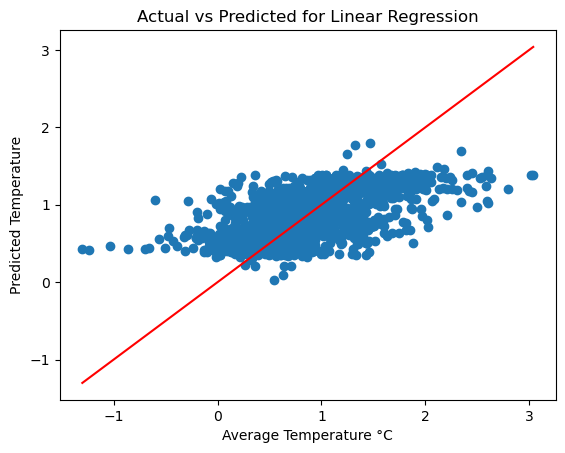

In [16]:
# Plotting the actual vs predicted for Linear Regression
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Average Temperature °C')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted for Linear Regression')
plt.show()

d) Random Forest Model

In [17]:
# Perform regression using the random forest model and evaluates performance
rs=RandomForestRegressor()
rs.fit(X_train,y_train)
y_pred1=rs.predict(X_test)
y_pred1
print("Mean Absolute Error:",mean_absolute_error(y_test,y_pred1))
print("Mean Squared Error:",mean_squared_error(y_test,y_pred1))
print("Root Mean Squared Error:",np.sqrt(mean_squared_error(y_test,y_pred1)))
print("R2 Score:",r2_score(y_test,y_pred1)) 

Mean Absolute Error: 0.2567339768923208
Mean Squared Error: 0.12148019554691994
Root Mean Squared Error: 0.3485400917353984
R2 Score: 0.6037445866380141


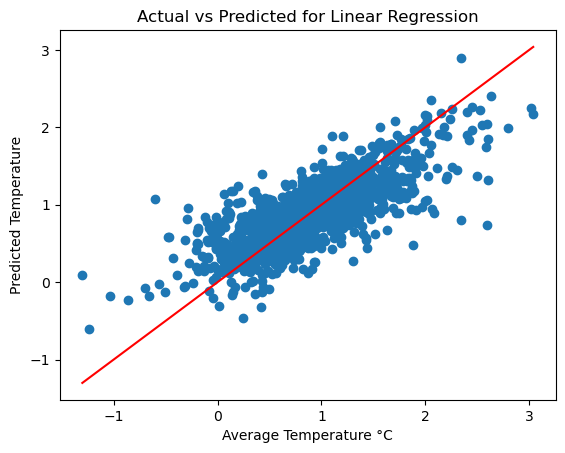

In [18]:
# Plotting the actual vs predicted for Random Forest Model
plt.scatter(y_test, y_pred1)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Average Temperature °C')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted for Linear Regression')
plt.show()

e) Decision Tree Model

In [19]:
# Perform regression using the decision tree model and evaluates performance
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred2 = dt.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred2))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred2))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred2)))
print("R2-Score:", r2_score(y_test, y_pred2))

Mean Absolute Error: 0.3434421821959373
Mean Squared Error: 0.23316076751266596
Root Mean Squared Error: 0.48286723590720665
R2-Score: 0.239454497956874


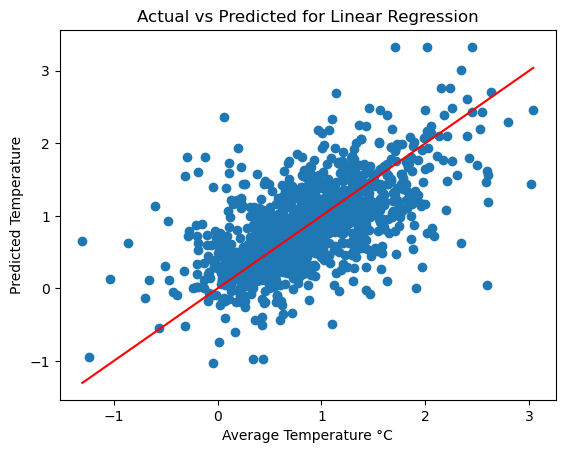

In [20]:
# Plotting the actual vs predicted for Decision Tree Model
plt.scatter(y_test, y_pred2)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')
plt.xlabel('Average Temperature °C')
plt.ylabel('Predicted Temperature')
plt.title('Actual vs Predicted for Linear Regression')
plt.show()


## Insights 🏭
We summarize findings from the analysis and discuss any conclusions drawn and insights gained from the data.


In the first *Linear Regression Model* relating to greenhouse emmissions the following can be infered from the below results:

| Metric                      | Value                     |
| --------------------------- | ------------------------- |
| Mean Absolute Error         | 0.34756372230709676       |
| Mean Squared Error          | 0.20971211789374067       |
| Root Mean Squared Error     | 0.45794335664330876       |
| R2-Score                    | 0.31594148668532773       |73


- The MAE and MSE indicate that the linear regression model has a moderate level of prediction error, with the RMSE providing a sense of the average magnitude of these errors.
- The R-squared score indicates that the model doesn't account for much of the variability in the target variable. This suggests that the model might not be capturing the data's relationships well or that there could be other important factors missing.

In the second *Random Forest Model*, we have the following findings:

| Metric                      | Value                     |
| --------------------------- | ------------------------- |
| Mean Absolute Error         | 0.25567236395766285       |
| Mean Squared Error          | 0.12099899279586994       |
| Root Mean Squared Error     | 0.3478490948613636        |
| R2 Score                    | 0.6053142185781817        |817

- The MAE, MSE, RMSE indicate that the linear regression model has a moderate to low level of prediction error.
- The R-squared score means that approximately 60.53% of the variability in the target variable is explained by the model. This indicates a moderate to good fit of the model to the data.

In the third and last *Decision Tree Model*, we make the following notes:

| Metric                      | Value                     |
| --------------------------- | ------------------------- |
| Mean Absolute Error         | 0.3434421821959373        |
| Mean Squared Error          | 0.23316076751266596       |
| Root Mean Squared Error     | 0.48286723590720665       |
| R2-Score                    | 0.239454497956874         |

- The model has moderate prediction errors. The errors are somewhat large, indicating that the model's predictions are not very close to the actual values on average. RMSE, in particular, shows the typical size of these errors.
- The model has a low R² score, suggesting that it does not explain much of the variability in the target variable. This could imply that the model might not be fitting the data well or that there are important predictors missing.

Now comparing all three models:

| Metric                    | Linear Regression | Random Forest      | Decision Tree      |
|---------------------------|-------------------|--------------------|--------------------|
| Mean Absolute Error    | 0.3476            | 0.2557             | 0.3434             |
| Mean Squared Error     | 0.2097            | 0.1210             | 0.2332             |
| Root Mean Squared Error| 0.4579            | 0.3478             | 0.4829             |
| R² Score               | 0.3159            | 0.6053             | 0.2395  
  |


- *Random Forest* consistently outperforms both *Linear Regression* and *Decision Tree* in all metrics, showing it has the best prediction accuracy and explanatory power among the three models.

- *Linear Regression* performs reasonably but has higher errors and a lower R² score compared to *Random Forest*.

- *Decision Tree* has higher errors and a lower R² score than *Random Forest*, but it performs better than *Linear Regression* in some metrics, like MAE. However, it tends to overfit, which is evident from its higher RMSE and lower R² score compared to *Random Forest*.

## Conclusion 🏭

The Random Forest model is the most effective model in this case, providing the lowest errors and the highest R² score. The Decision Tree model has some performance issues, and the Linear Regression model, while simple, does not perform as well as the more complex Random Forest.
